### Q1.

In [1162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [1163]:
data = {
    'i': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'Temp.': [50, 50, 50, 70, 70, 70, 80, 80, 80, 90, 90, 90, 100, 100, 100],
    'Yield': [3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3.0, 3.1, 2.8, 3.3, 3.5, 3.0]
}
df=pd.DataFrame(data)
df.to_csv('yeildData.csv')

In [1164]:
x=df['Temp.'].values
y=df['Yield'].values

In [1165]:
def linear(x,y):
    X = np.array([[len(x),np.sum(x)],[np.sum(x),np.sum(x**2)]])
    Y = np.array([np.sum(y),np.sum(x*y)])

    B0,B1 = np.dot(np.linalg.inv(X),Y)
    return B0,B1

In [1166]:
def poly(x,y,n):
    X=[]
    Y=[]
    for i in range(n + 1):
        temp = []
        for j in range(n + 1):
            term = np.sum(x**(i + j))
            temp.append(term)
        X.append(temp)

    for i in range(n+1):
        term=np.sum((x**i)*y)
        Y.append(term)
        
    X = np.array(X)
    Y = np.array(Y)
    
    B = np.dot(np.linalg.inv(X),Y)
    
    return B

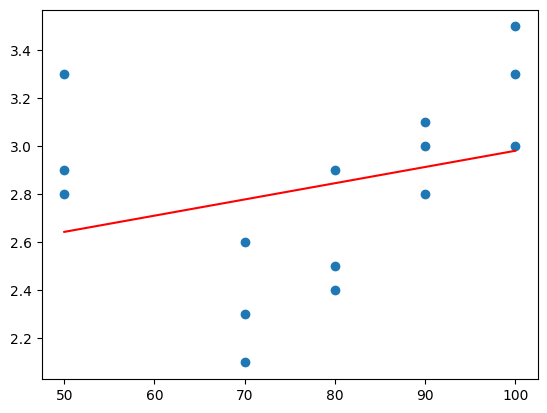

In [1167]:
b0,b1=linear(x,y)
y_lin_pred=b1*x+b0
plt.scatter(x,y)
plt.plot(x,y_lin_pred,color='r')

In [1168]:
error=np.sum(abs(y_lin_pred-y))
mse=np.mean((y_lin_pred-y)**2)
rmse=np.sqrt(np.mean((y_lin_pred-y)**2))
print('Error: ',error,'MSE: ',mse,'RMSE: ',rmse)

Error:  4.491891891891874 MSE:  0.13270870870870877 RMSE:  0.36429206511905904


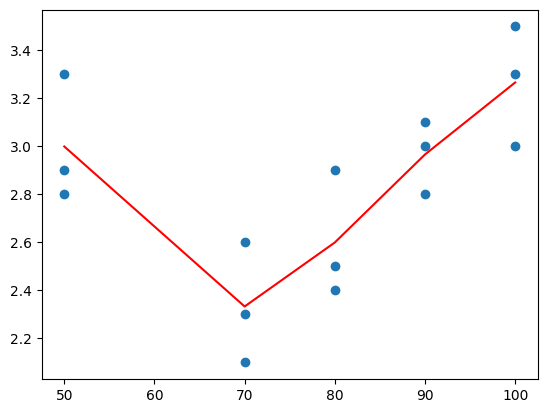

In [1169]:
B=poly(x,y,5)
y_poly_pred=0
for i in range(len(B)):
    y_poly_pred+=B[i]*(x**i)
plt.scatter(x,y)
plt.plot(x,y_poly_pred,color='r')

In [1170]:
error=np.sum(abs(y_poly_pred-y))
mse=np.mean((y_poly_pred-y)**2)
rmse=np.sqrt(np.mean((y_poly_pred-y)**2))
print('Error: ',error,'MSE: ',mse,'RMSE: ',rmse)

Error:  2.6000001659470224 MSE:  0.03866666666666895 RMSE:  0.19663841605004082


### Q2.

In [1171]:
df=pd.read_csv('rabbit.csv')

In [1172]:
X=df[['Area','X2','X3']].values
Y=df['Infarc'].values

X = np.insert(X, 0, 1, axis=1)

In [1173]:
def multiple(X,Y):
    return np.dot(np.linalg.inv(X.T@X),X.T@Y)


In [1174]:
B=multiple(X,Y)
y_pred=np.dot(X,B)

error=np.sum(abs(y_pred-Y))
mse=np.mean((y_pred-Y)**2)
rmse=np.sqrt(np.mean((y_pred-Y)**2))
print('Error: ',error,'MSE: ',mse,'RMSE: ',rmse)

Error:  3.092145587694252 MSE:  0.017028422624564207 RMSE:  0.13049299837372197


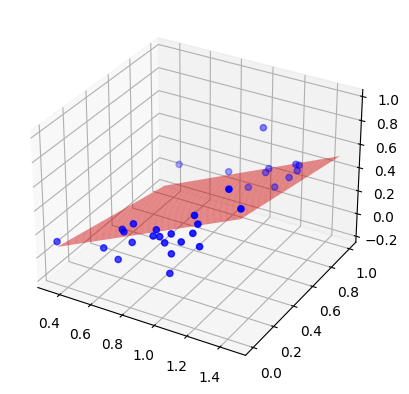

In [1175]:
ax = plt.axes(projection='3d')
ax.scatter(df['Area'], df['X2'], Y, color='blue')

x1_val = np.linspace(df['Area'].min(), df['Area'].max(), 100)
x2_val = np.linspace(df['X2'].min(), df['X2'].max(), 100)

x_axis, y_axis = np.meshgrid(x1_val, x2_val)
y_grid = B[0] + B[1] * x_axis + B[2] * y_axis

ax.plot_surface(x_axis, y_axis, y_grid, color='red', alpha=0.5)

## *Additional Questions*

In [1176]:
from sklearn.linear_model import LinearRegression

### Q1.

In [1177]:
df=pd.read_csv('gold_price.csv')
x=df['Year'].values.reshape(-1, 1)
y=df['Price'].values.reshape(-1, 1)

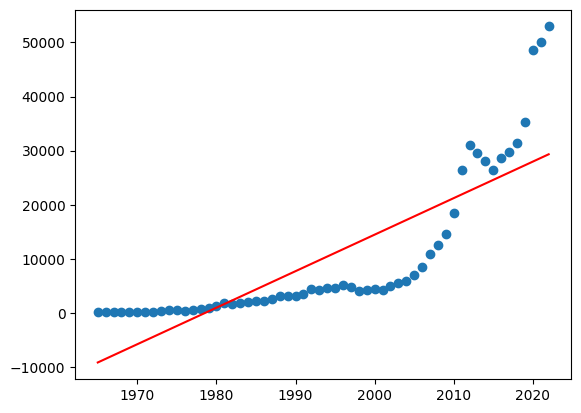

In [1178]:
b0,b1=linear(x,y)
y_pred=b0+b1*x
plt.scatter(x,y)
plt.plot(x,y_pred,color='r')

In [1179]:
reg=LinearRegression().fit(x,y)
B0=reg.intercept_[0]
B1=reg.coef_[0][0]

In [1180]:
print('Diff in B0:',b0-B0,'\nDiff in B1:',b1-B1)


Diff in B0: 1.6682315617799759e-06 
Diff in B1: -8.327560863108374e-10


In [1181]:
error=np.sum(abs(y_pred-y))
mse=np.mean((y_pred-y)**2)
rmse=np.sqrt(np.mean((y_pred-y)**2))
print('Error: ',error,'MSE: ',mse,'RMSE: ',rmse)

Error:  366141.8305083541 MSE:  62644360.72375509 RMSE:  7914.819058181627


In [1182]:
print('Price in 2025 for 1 gm:',(b0+b1*2025)/10)

Price in 2025 for 1 gm: 3134.4204558719416


### Q2.

In [1183]:
df=pd.read_csv('gold_silver_price.csv')
df=df.dropna()

In [1184]:
x=df['Year'].values.reshape(-1, 1)
X = np.insert(x, 0, 1, axis=1)
Y1=df['GoldPrice']
Y2=df['SilverPrice']
Y=pd.concat((Y1,Y2),axis=1).values

In [1185]:
b01,b02,b11,b12=multiple(X,Y).flatten()
y_pred_gold=b01+x*b11
y_pred_silver=b02+x*b12

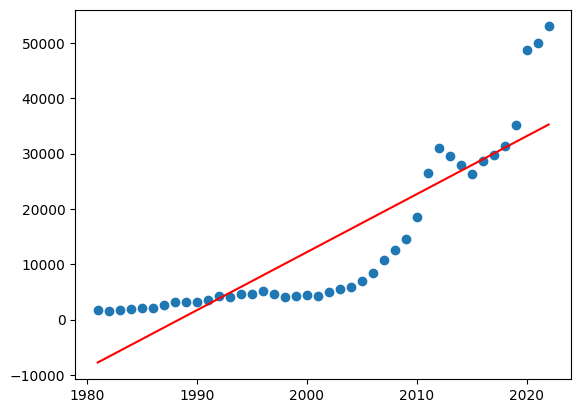

In [1186]:
plt.scatter(x,Y1)
plt.plot(x,y_pred_gold,color='r')

In [1187]:
error=np.sum(abs(y_pred_gold-Y1.values))
mse=np.mean((y_pred_gold-Y1.values)**2)
rmse=np.sqrt(np.mean((y_pred_gold-Y1.values)**2))
print('Error: ',error,'MSE: ',mse,'RMSE: ',rmse)

Error:  27340887.07768225 MSE:  375147674.58238417 RMSE:  19368.729297049515


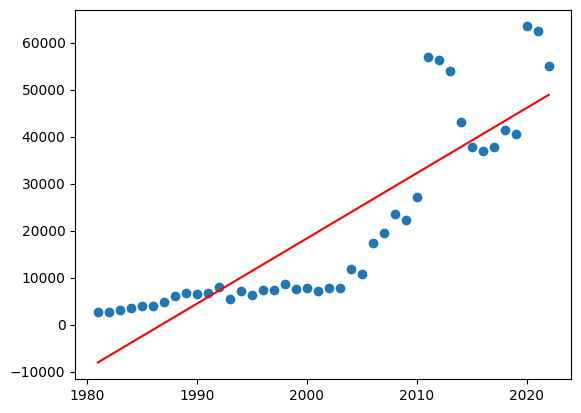

In [1188]:
plt.scatter(x,Y2)
plt.plot(x,y_pred_silver,color='r')

In [1189]:
error=np.sum(abs(y_pred_silver-Y2.values))
mse=np.mean((y_pred_silver-Y2.values)**2)
rmse=np.sqrt(np.mean((y_pred_silver-Y2.values)**2))
print('Error: ',error,'MSE: ',mse,'RMSE: ',rmse)

Error:  36785134.14825246 MSE:  661391164.8663671 RMSE:  25717.526414225125


In [1190]:
reg=LinearRegression().fit(X,Y)
B01,B02=reg.intercept_
_,B11,_,B12=reg.coef_.flatten()

In [1191]:
print('Diff in B01:',b01-B01,'\nDiff in B11:',b11-B11)
print('Diff in B02:',b02-B02,'\nDiff in B12:',b12-B12)

Diff in B01: 3.967201337218285e-06 
Diff in B11: -1.9874732970492914e-09
Diff in B02: 5.267094820737839e-06 
Diff in B12: -2.644355845404789e-09


In [1192]:
print('Price in 2025 for 1 gm Gold:',(b01+b11*2025)/10)
print('Price in 2025 for 1 gm Silver:',(b02+b12*2025)/1000)

Price in 2025 for 1 gm Gold: 3838.6105988112276
Price in 2025 for 1 gm Silver: 53.05921502840798


### Q3.

In [1193]:
x=df['Year'].values
y=df['SilverPrice'].values

For Degree 1
Error:  339637.3493767376 MSE:  94699881.65523104 RMSE:  9731.386419993352
For Degree 2
Error:  207233.28668037057 MSE:  56330385.24639427 RMSE:  7505.3571031893125
For Degree 5
Error:  705764.597636631 MSE:  378359272.19689566 RMSE:  19451.459384758142


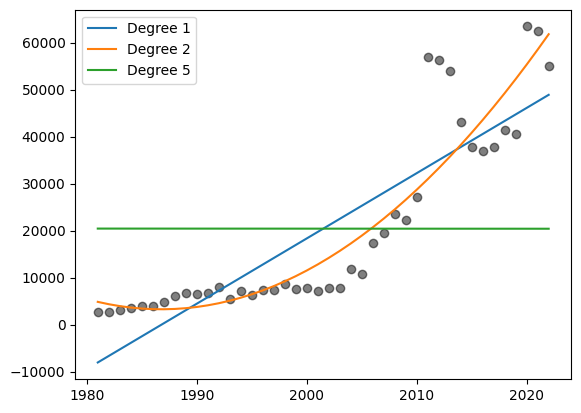

In [1231]:
plt.scatter(x,y,color='k',alpha=0.5)
for degree in [1, 2, 5]:
    B = poly(x, y, degree)
    y_poly_pred = sum(B[i] * (x**i) for i in range(len(B)))
    plt.plot(x, y_poly_pred, label=f'Degree {degree}')

    error=np.sum(abs(y_poly_pred-y))
    mse=np.mean((y_poly_pred-y)**2)
    rmse=np.sqrt(np.mean((y_poly_pred-y)**2))
    print(f'For Degree {degree}\nError: ',error,'MSE: ',mse,'RMSE: ',rmse)

plt.legend()
plt.show()